In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage import io

In [3]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255, 0, 0), 1)


    # Show the image
    #cv2.imshow('Matched Features', out)
    #cv2.waitKey(0)
    #cv2.destroyWindow('Matched Features')

    # Also return the image if you'd like a copy
    return out


In [61]:
def smoothImage(image, kSize=5):
    #kernel = np.ones((5, 5), np.float32) / 25
    #return cv2.filter2D(image, -1, kernel)
    return cv2.GaussianBlur(image,(kSize,kSize), 0)

In [5]:
orb = cv2.ORB()
sift = cv2.SIFT()
surf = cv2.SURF(400)


In [41]:
def showKeypoints(img, method):
    #img = img[36:174, 18:206]
    
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    keypoints = method.detect(gray, None)
    
    #img = cv2.drawKeypoints(gray,keypoints[0:100],img)
    img = cv2.drawKeypoints(gray,keypoints,img)
    plt.fig = plt.figure(figsize= (20,20))
    io.imshow(img)
    return img

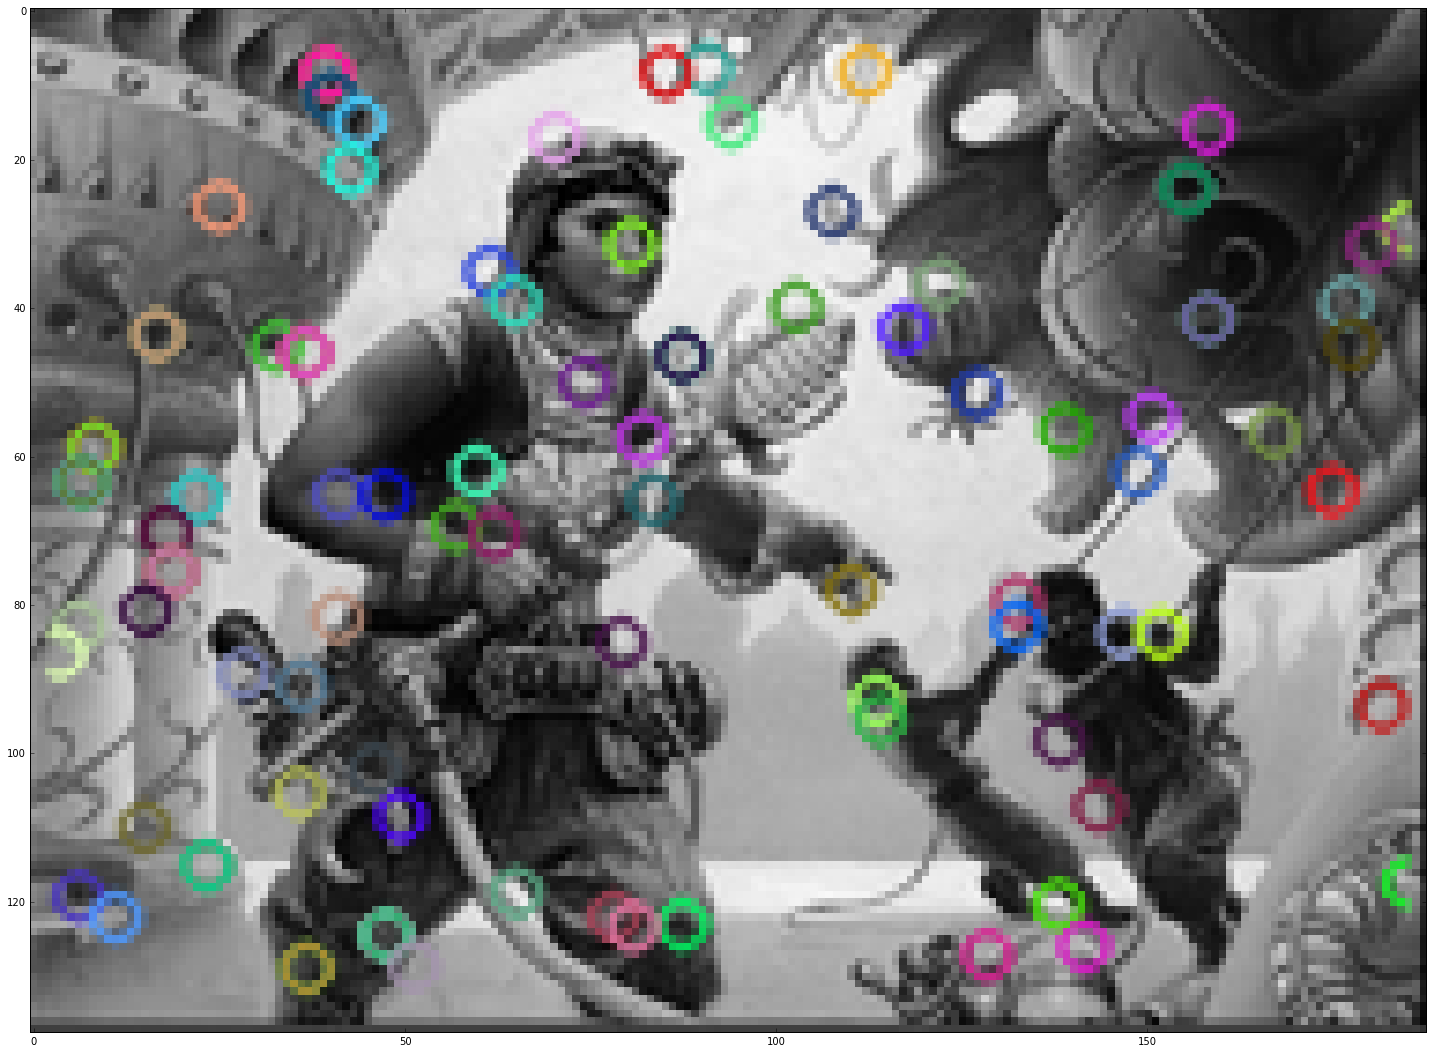

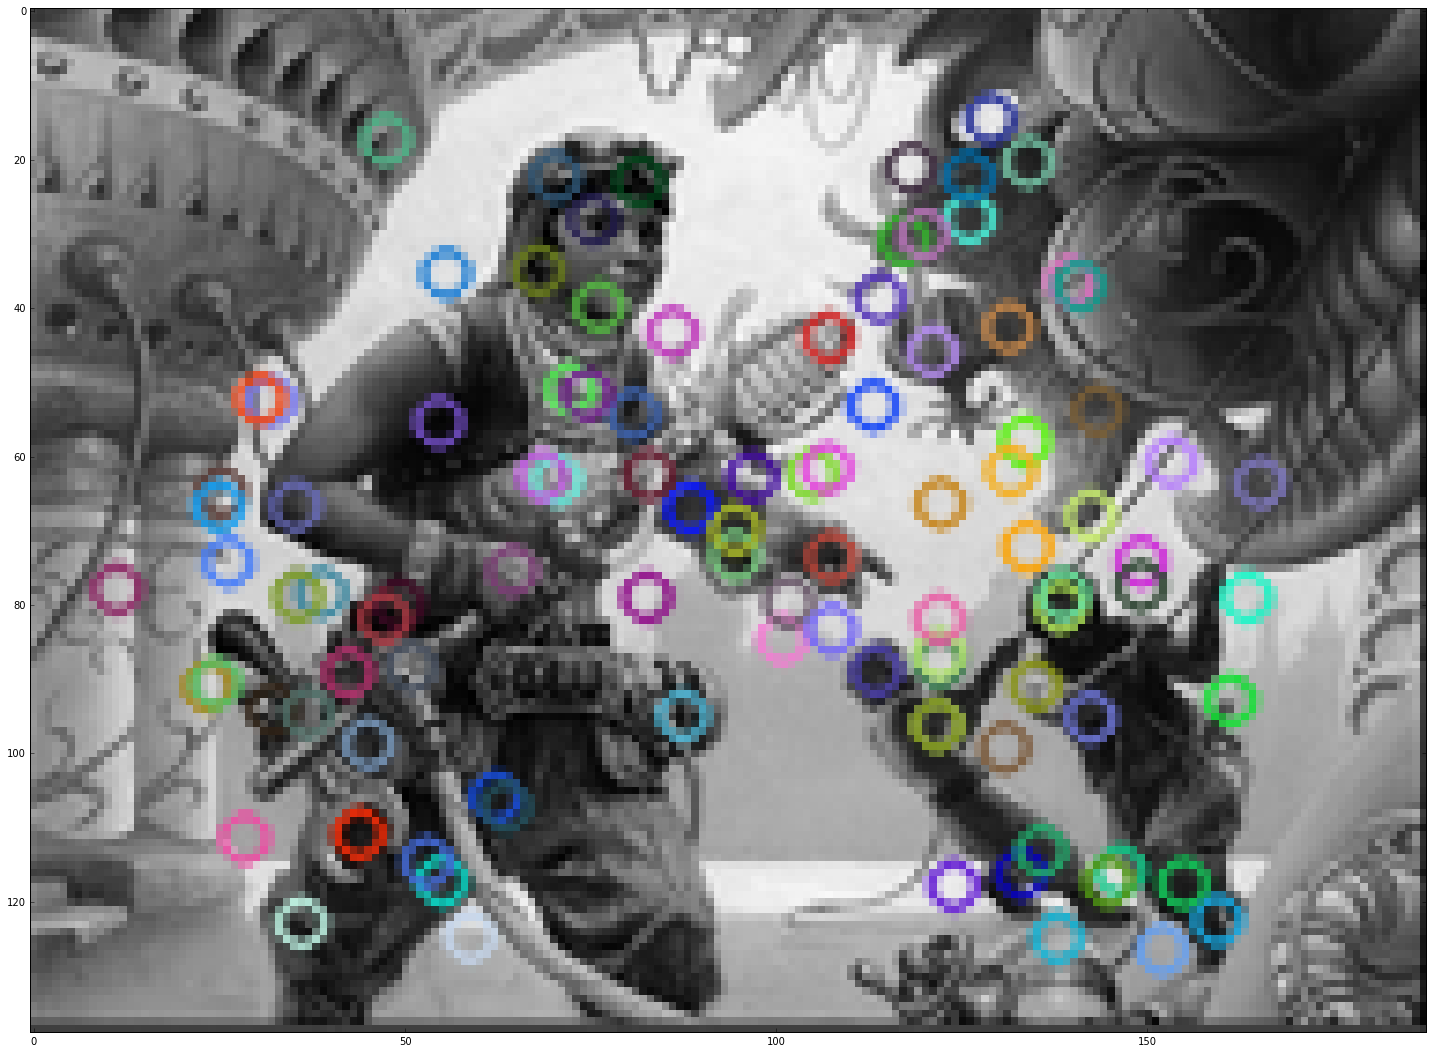

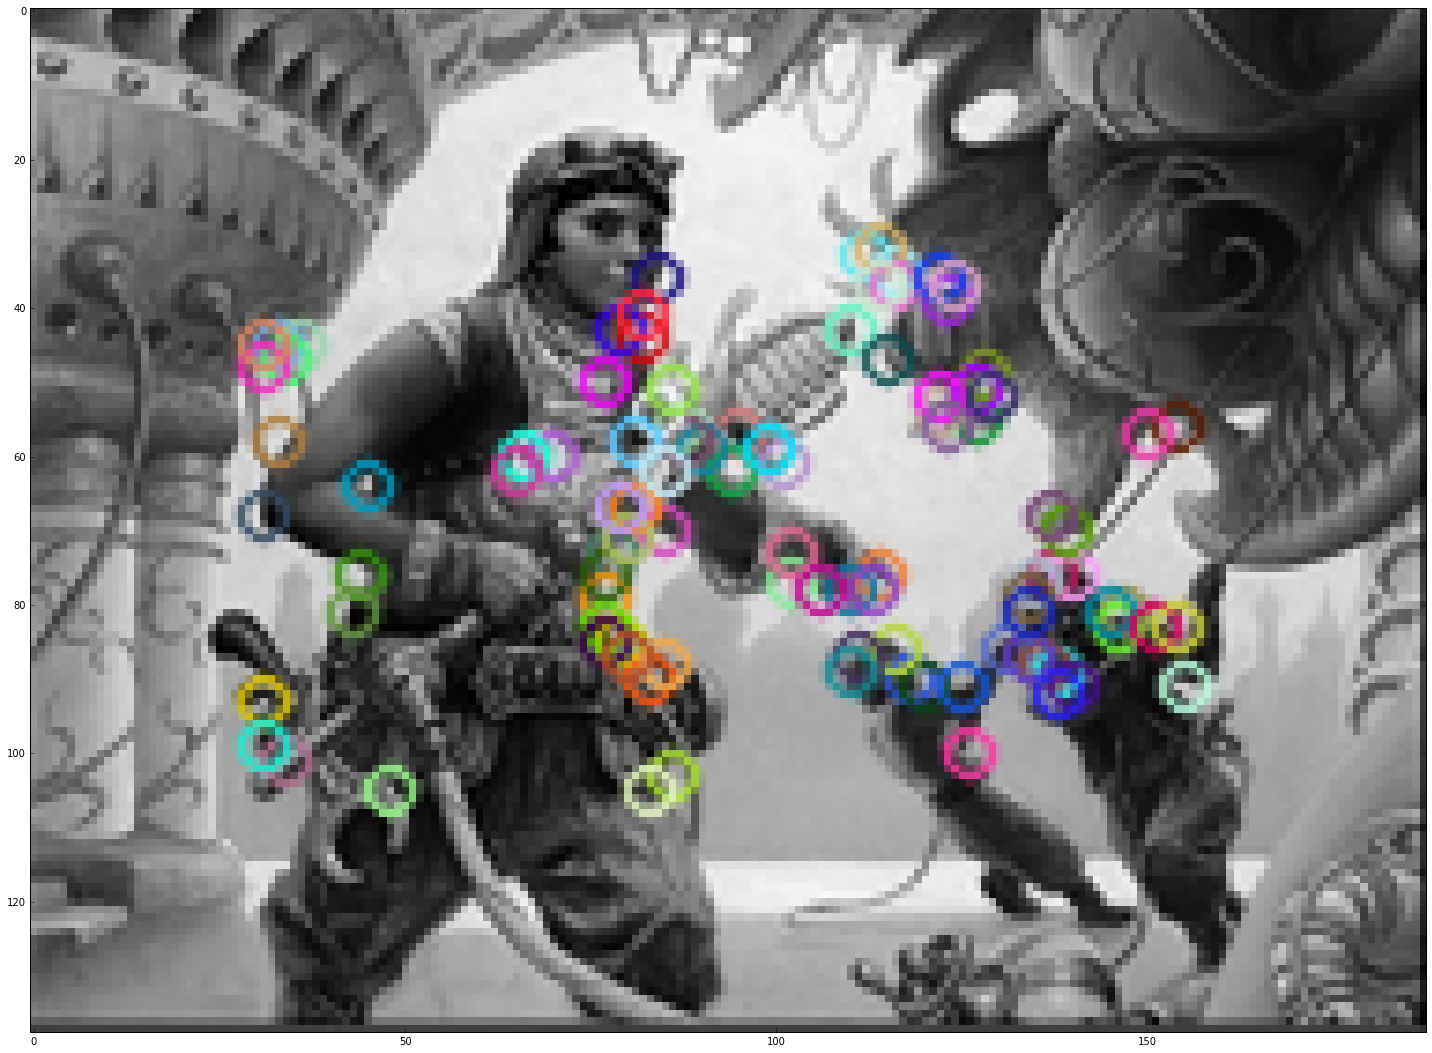

In [15]:
i = cv2.imread(os.getcwd() + '/data/img/KLD/Aviary Mechanic.png')

siftImg = showKeypoints(i, sift)
i = cv2.imread(os.getcwd() + '/data/img/KLD/Aviary Mechanic.png')
surfImg = showKeypoints(i, surf)
i = cv2.imread(os.getcwd() + '/data/img/KLD/Aviary Mechanic.png')
orbImg = showKeypoints(i, orb)

In [8]:
cv2.imwrite(os.getcwd() + '/data/sift.png', siftImg)
cv2.imwrite(os.getcwd() + '/data/surf.png', surfImg)
cv2.imwrite(os.getcwd() + '/data/orb.png', orbImg)

True

True

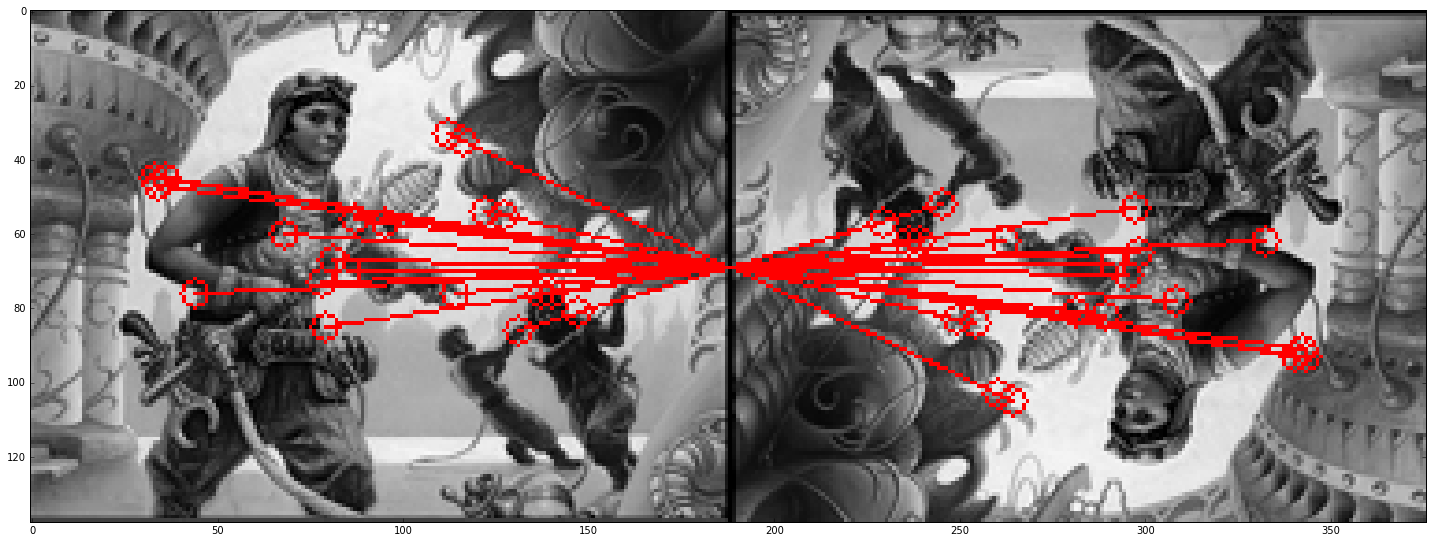

In [9]:
i = cv2.imread(os.getcwd() + '/data/img/KLD/Aviary Mechanic.png')
i = i[36:174, 18:206]
i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
#i2 = cv2.flip(i, 0)
i2 = i

rows,cols, = i2.shape

# Create a 2D rotationsmatrix
M = cv2.getRotationMatrix2D((cols / 2,rows / 2), 180, 1)

i2 = cv2.warpAffine(i2, M, (cols, rows))

keypoints1, descriptor1 = orb.detectAndCompute(i, None)
keypoints2, descriptor2 = orb.detectAndCompute(i2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
m = bf.knnMatch(descriptor1, descriptor2, k=1)

mList = []
for n in m:
    mList.append(n[0])

plt.fig = plt.figure(figsize= (20,20))
match = drawMatches(i, keypoints1, i2, keypoints2, mList[0:20])
io.imshow(match)
cv2.imwrite(os.getcwd() + '/data/matchingSample.png', match)

(138, 940)


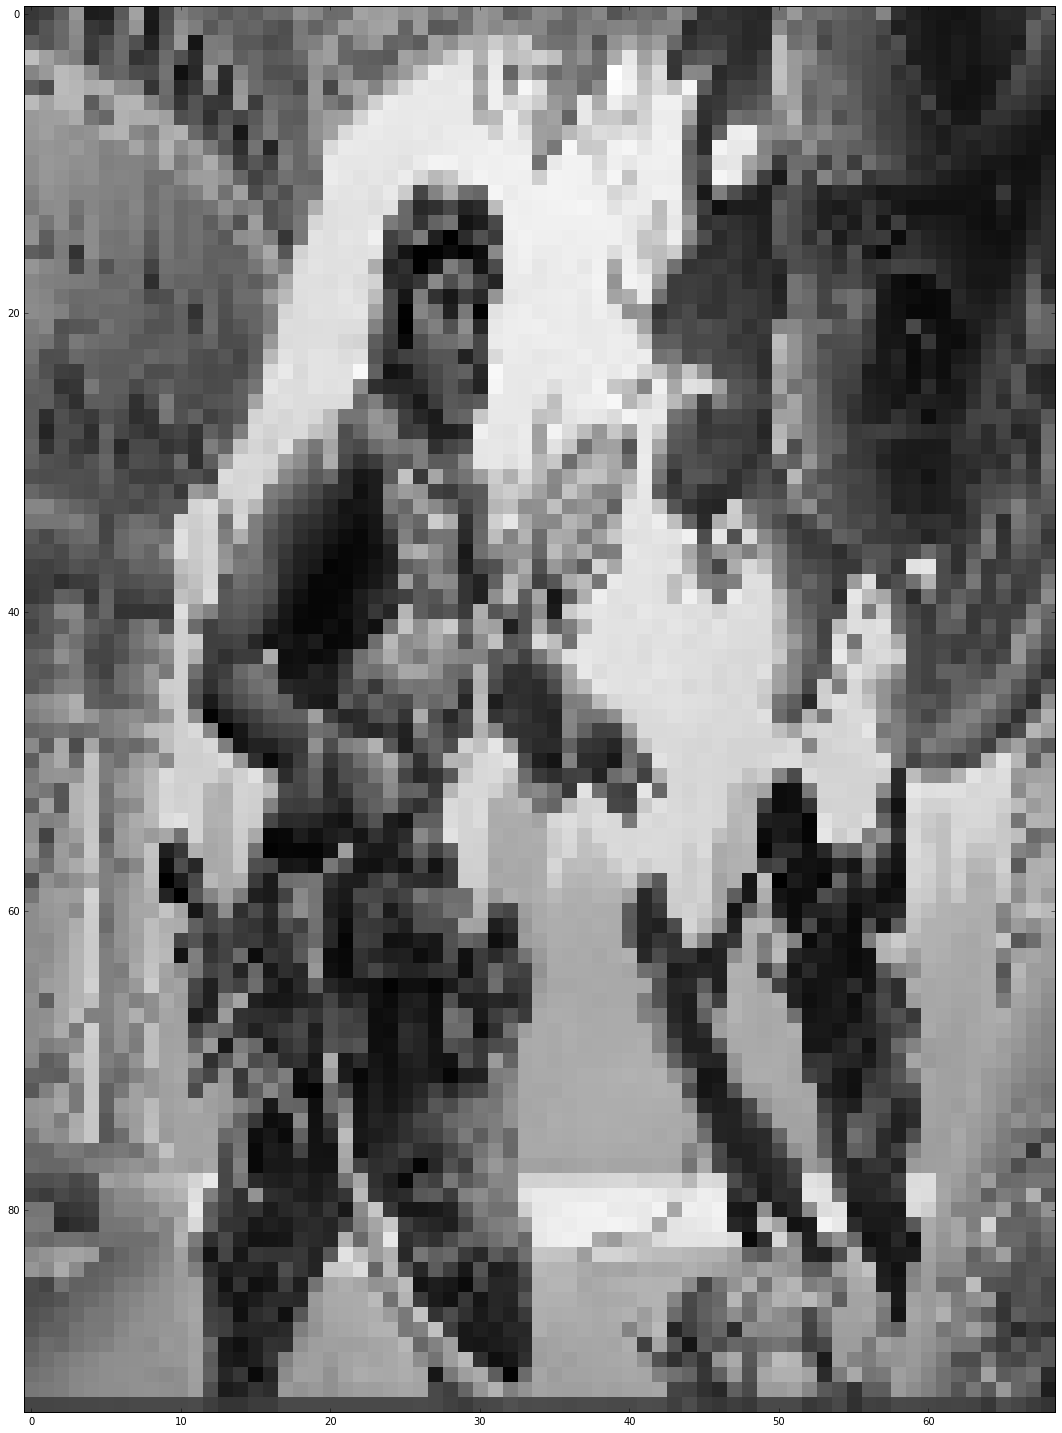

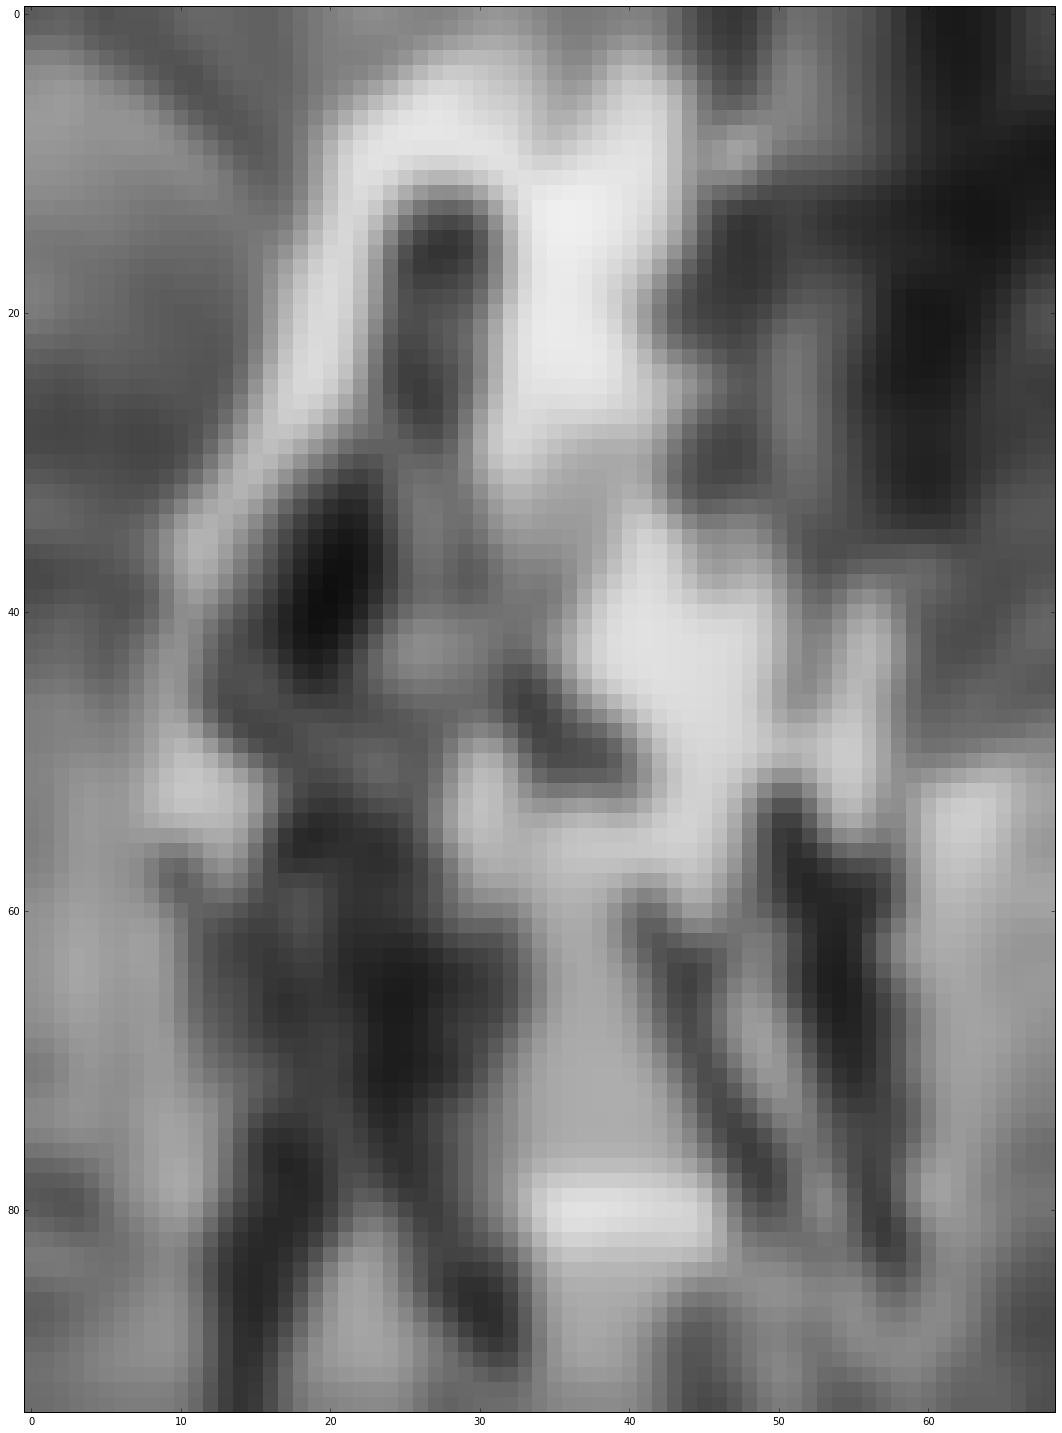

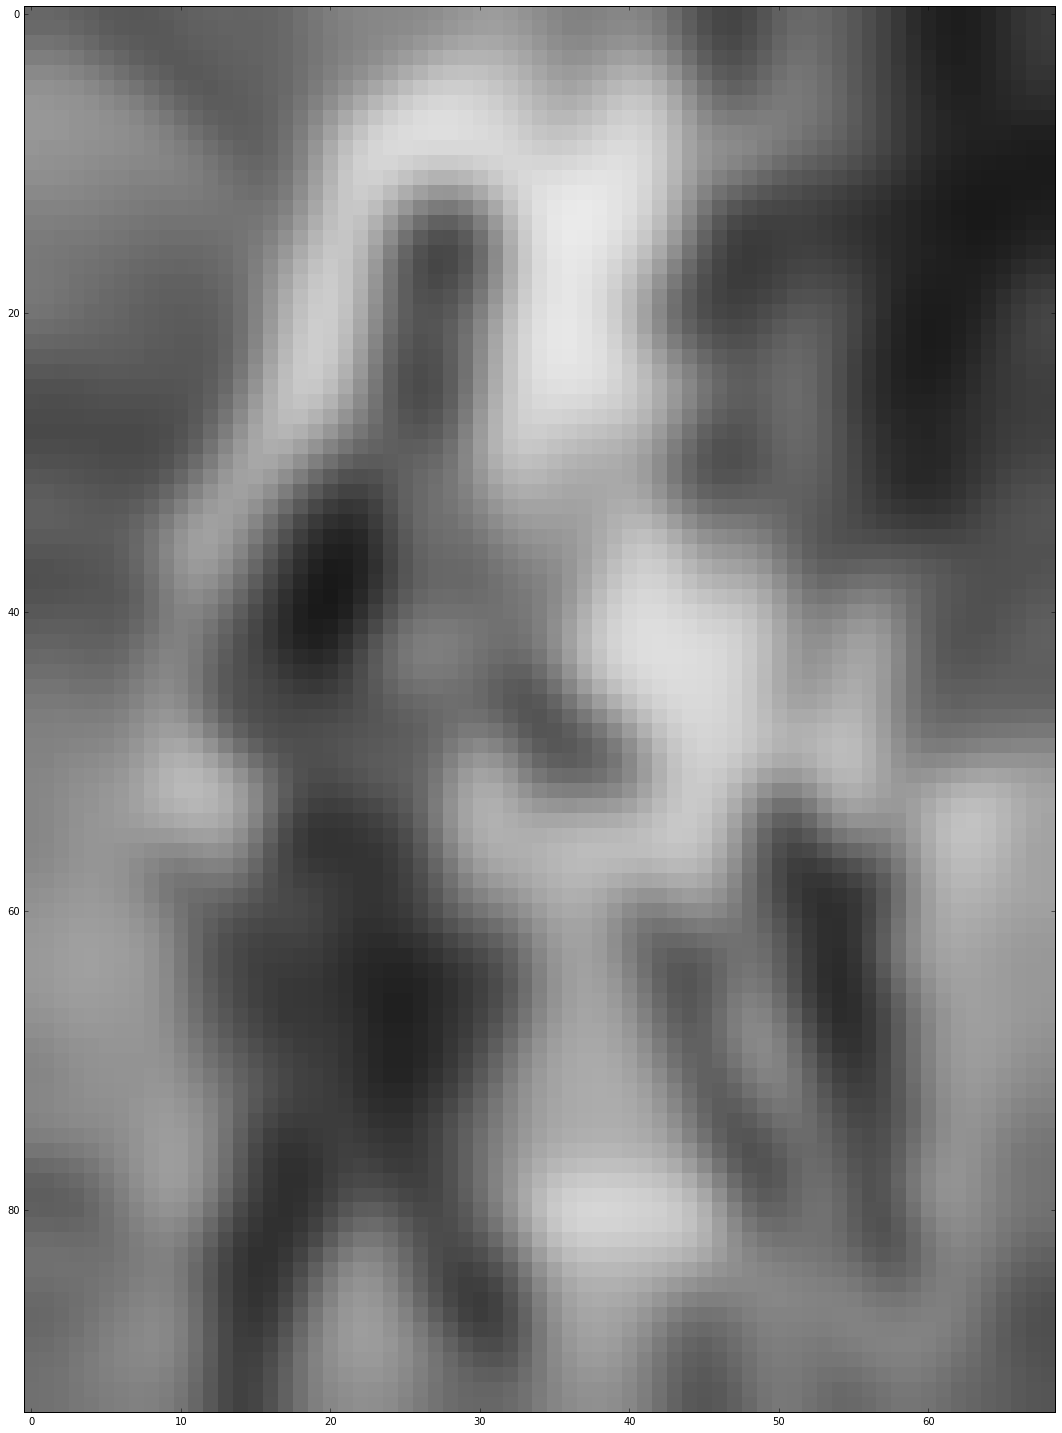

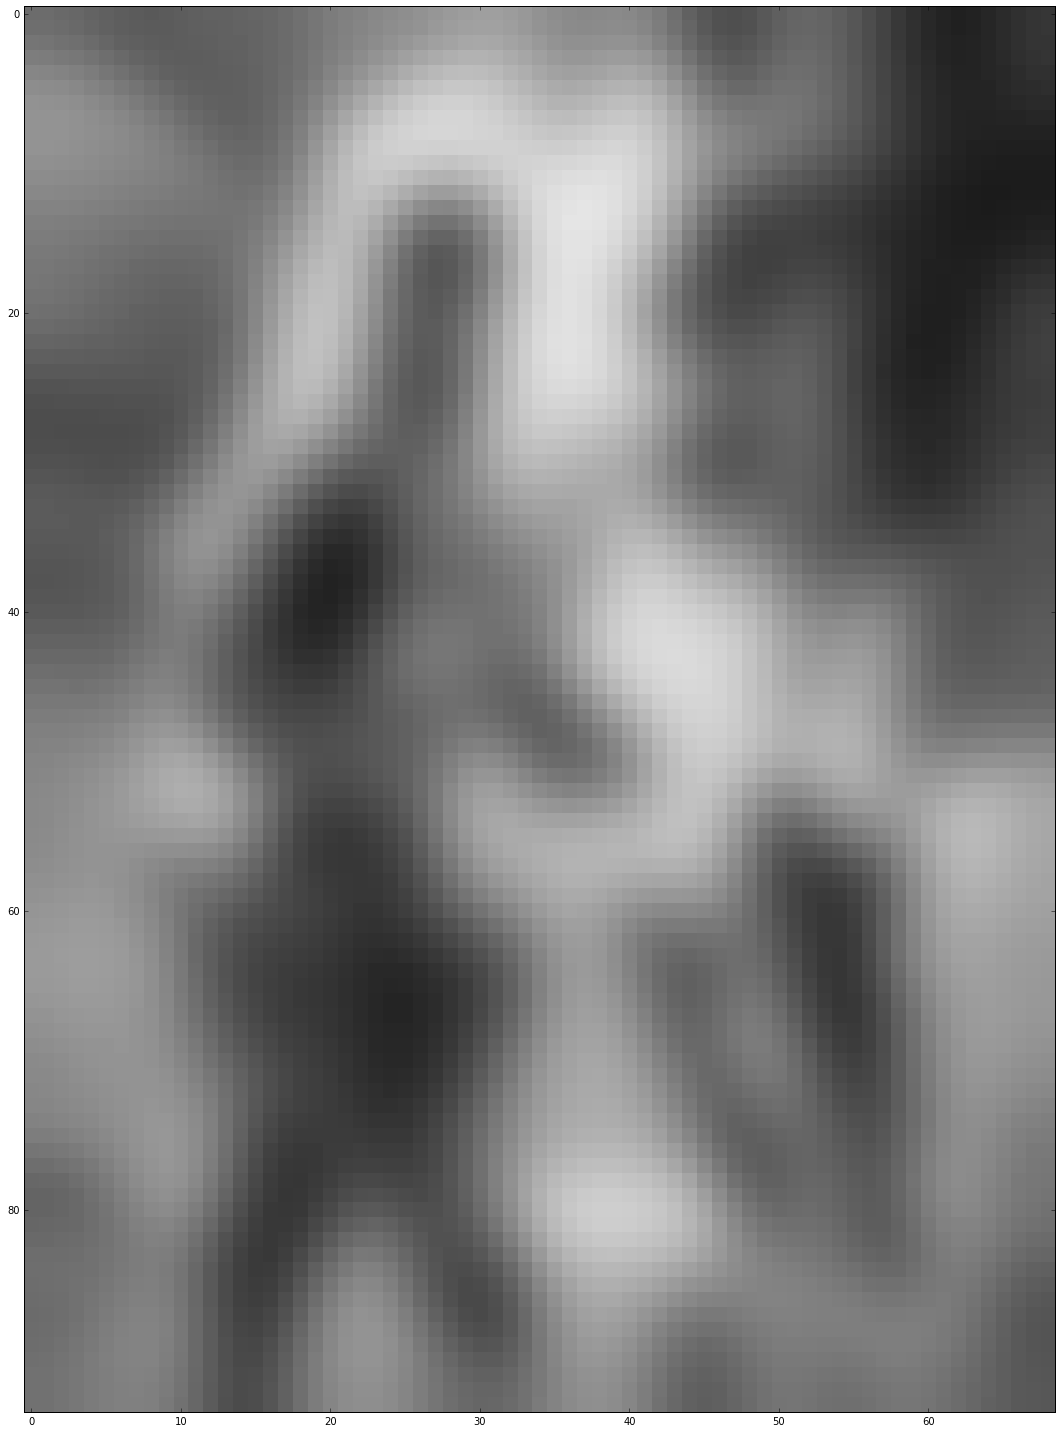

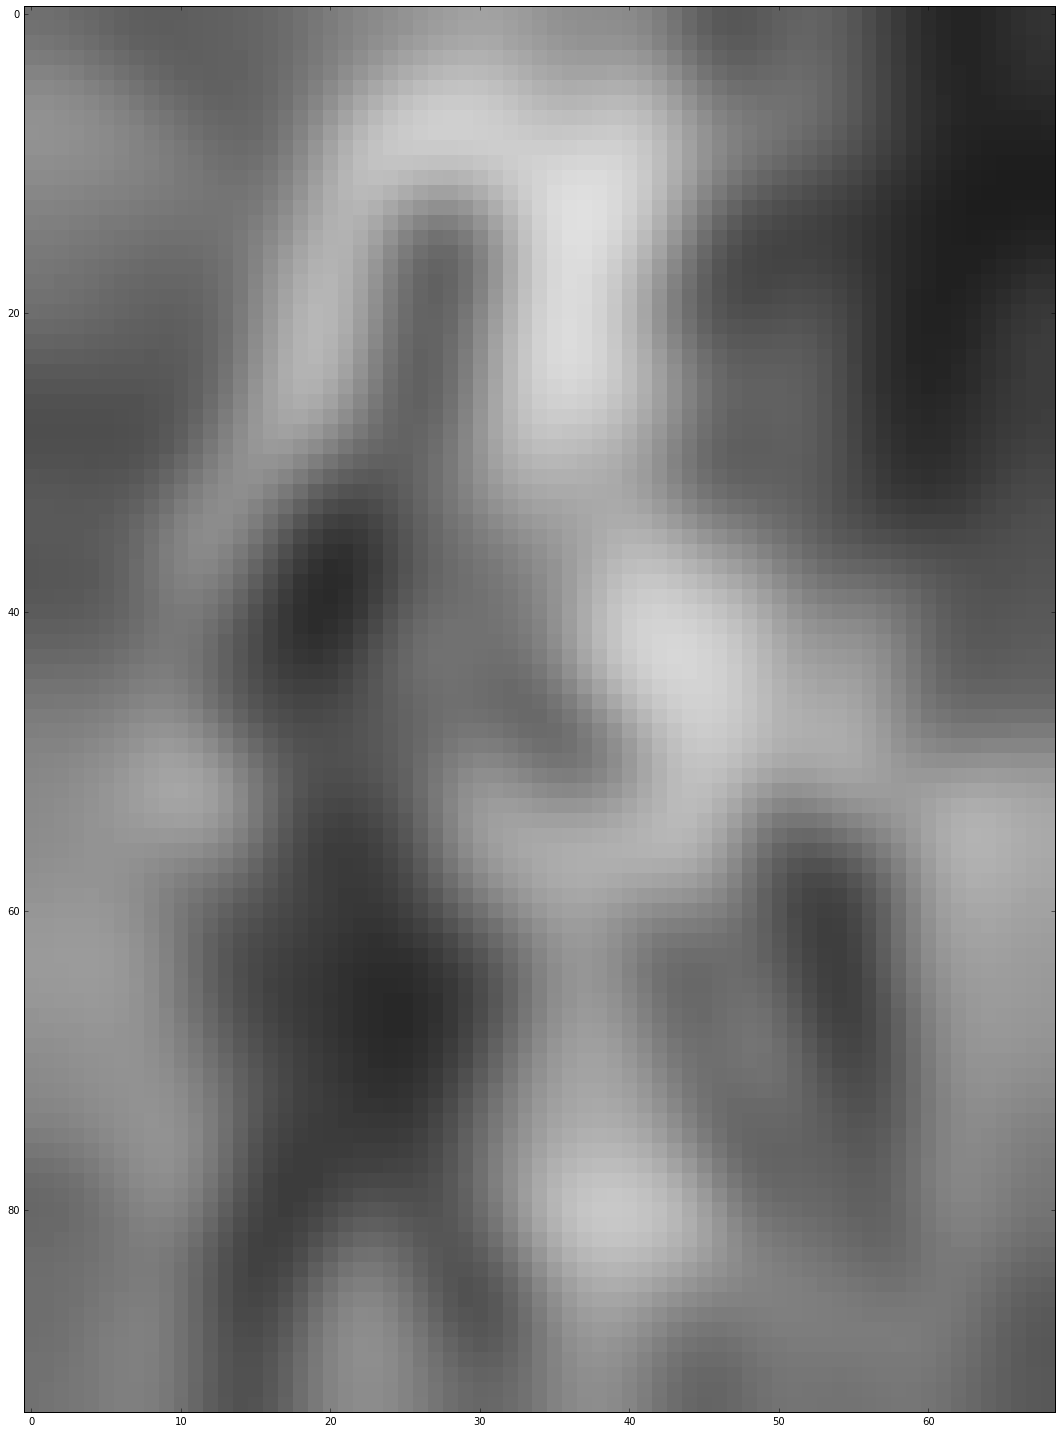

In [10]:
i = cv2.imread(os.getcwd() + '/data/img/KLD/Aviary Mechanic.png')
#i = cv2.imread(os.getcwd() + '/screenshot.png')
i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
i = i[36:174, 18:206]

bigImg = np.zeros((i.shape[0], i.shape[1] * 5))
bigImgDiff = np.zeros((i.shape[0], i.shape[1] * 4))

bigImg[0:i.shape[0], 0:i.shape[1]] = i
print bigImg.shape
for n in range(1, 5):
    #plt.fig = plt.figure(figsize= (20,20))
    #io.imshow(i)
    iOld = i
    i = smoothImage(i,  9)
    bigImg[0:i.shape[0], i.shape[1] * n:i.shape[1] * (n + 1)] = i
    bigImgDiff[0:i.shape[0], i.shape[1] * (n - 1):i.shape[1] * (n)] = i - iOld
    

cv2.imwrite(os.getcwd() + '/data/octave/first.png', bigImg)
cv2.imwrite(os.getcwd() + '/data/octave/firstDiv.png', bigImgDiff)

i = cv2.imread(os.getcwd() + '/data/img/KLD/Aviary Mechanic.png')
i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
i = i[36:174, 18:206]
i =  cv2.resize(i, (i.shape[0] / 2, i.shape[1] / 2), interpolation = cv2.INTER_CUBIC)

for n in range(0, 5):
    plt.fig = plt.figure(figsize= (20,20))
    io.imshow(i)
    i = smoothImage(i, 9)


True

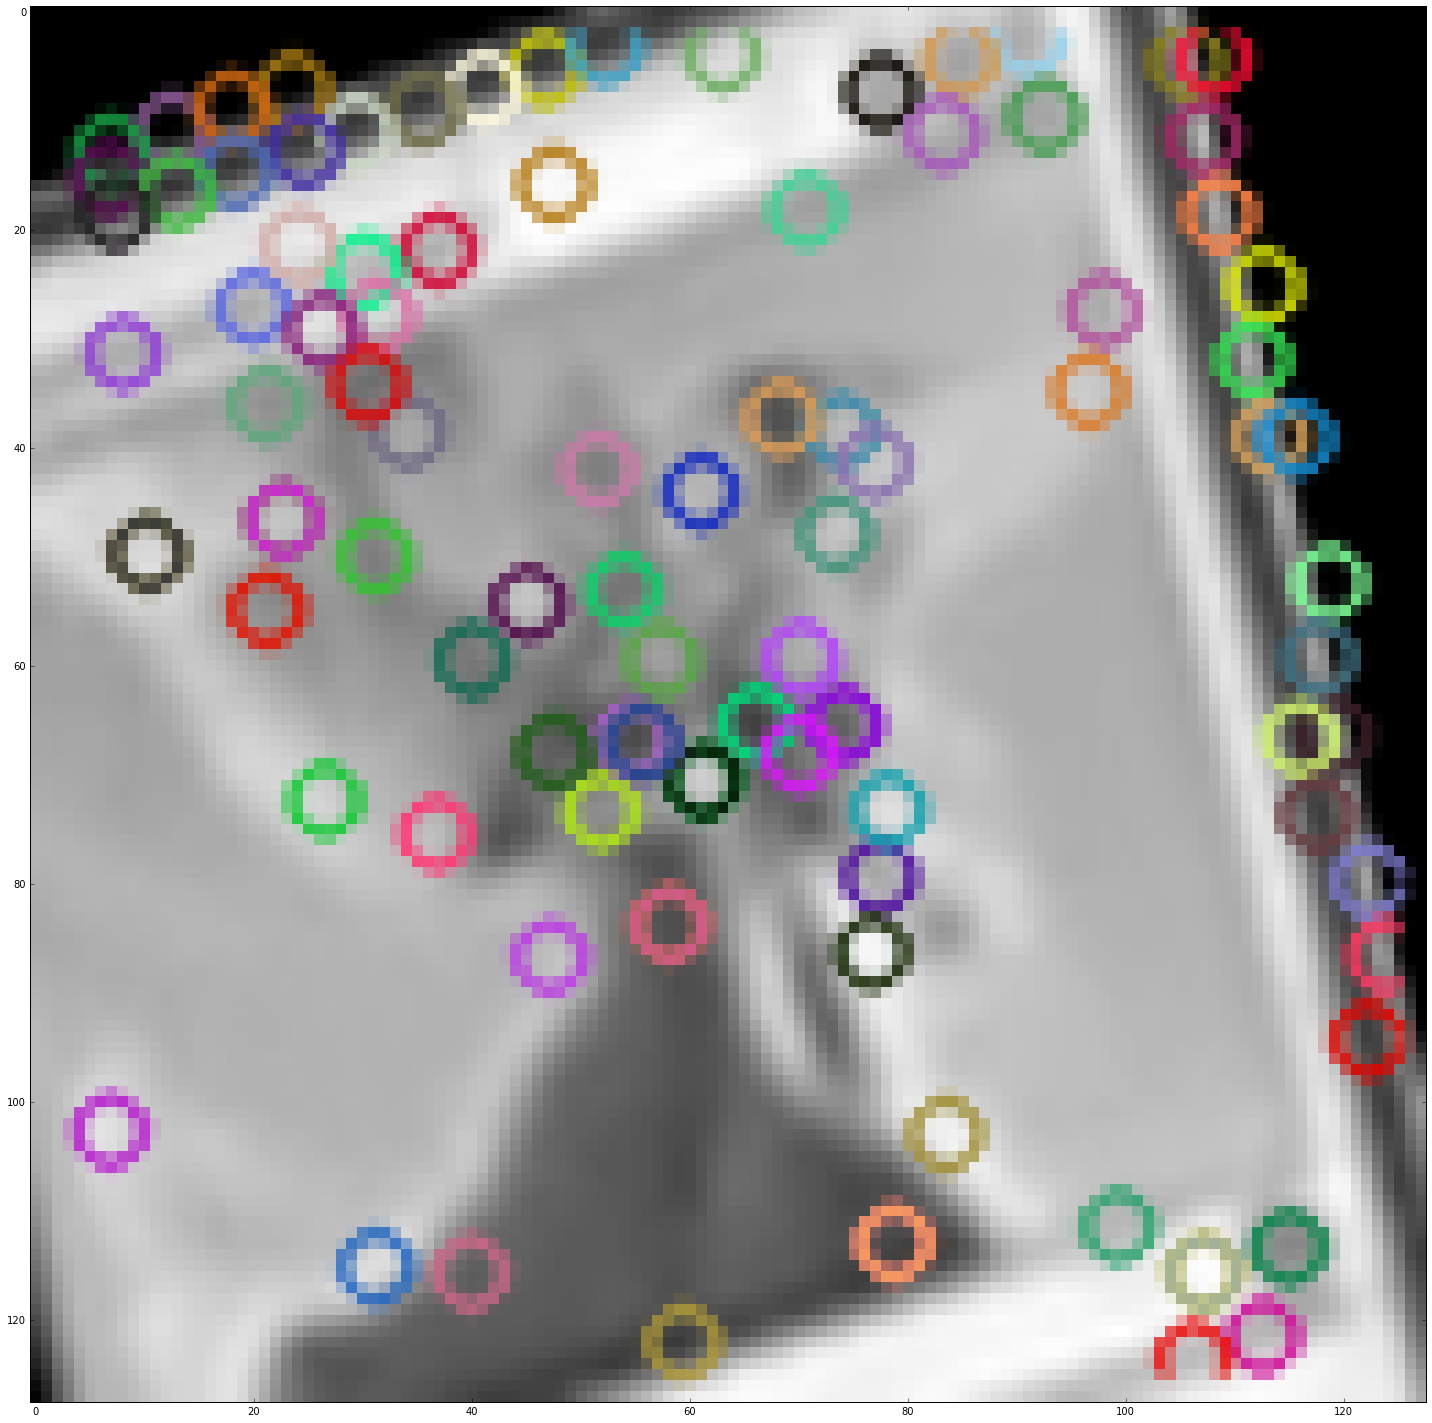

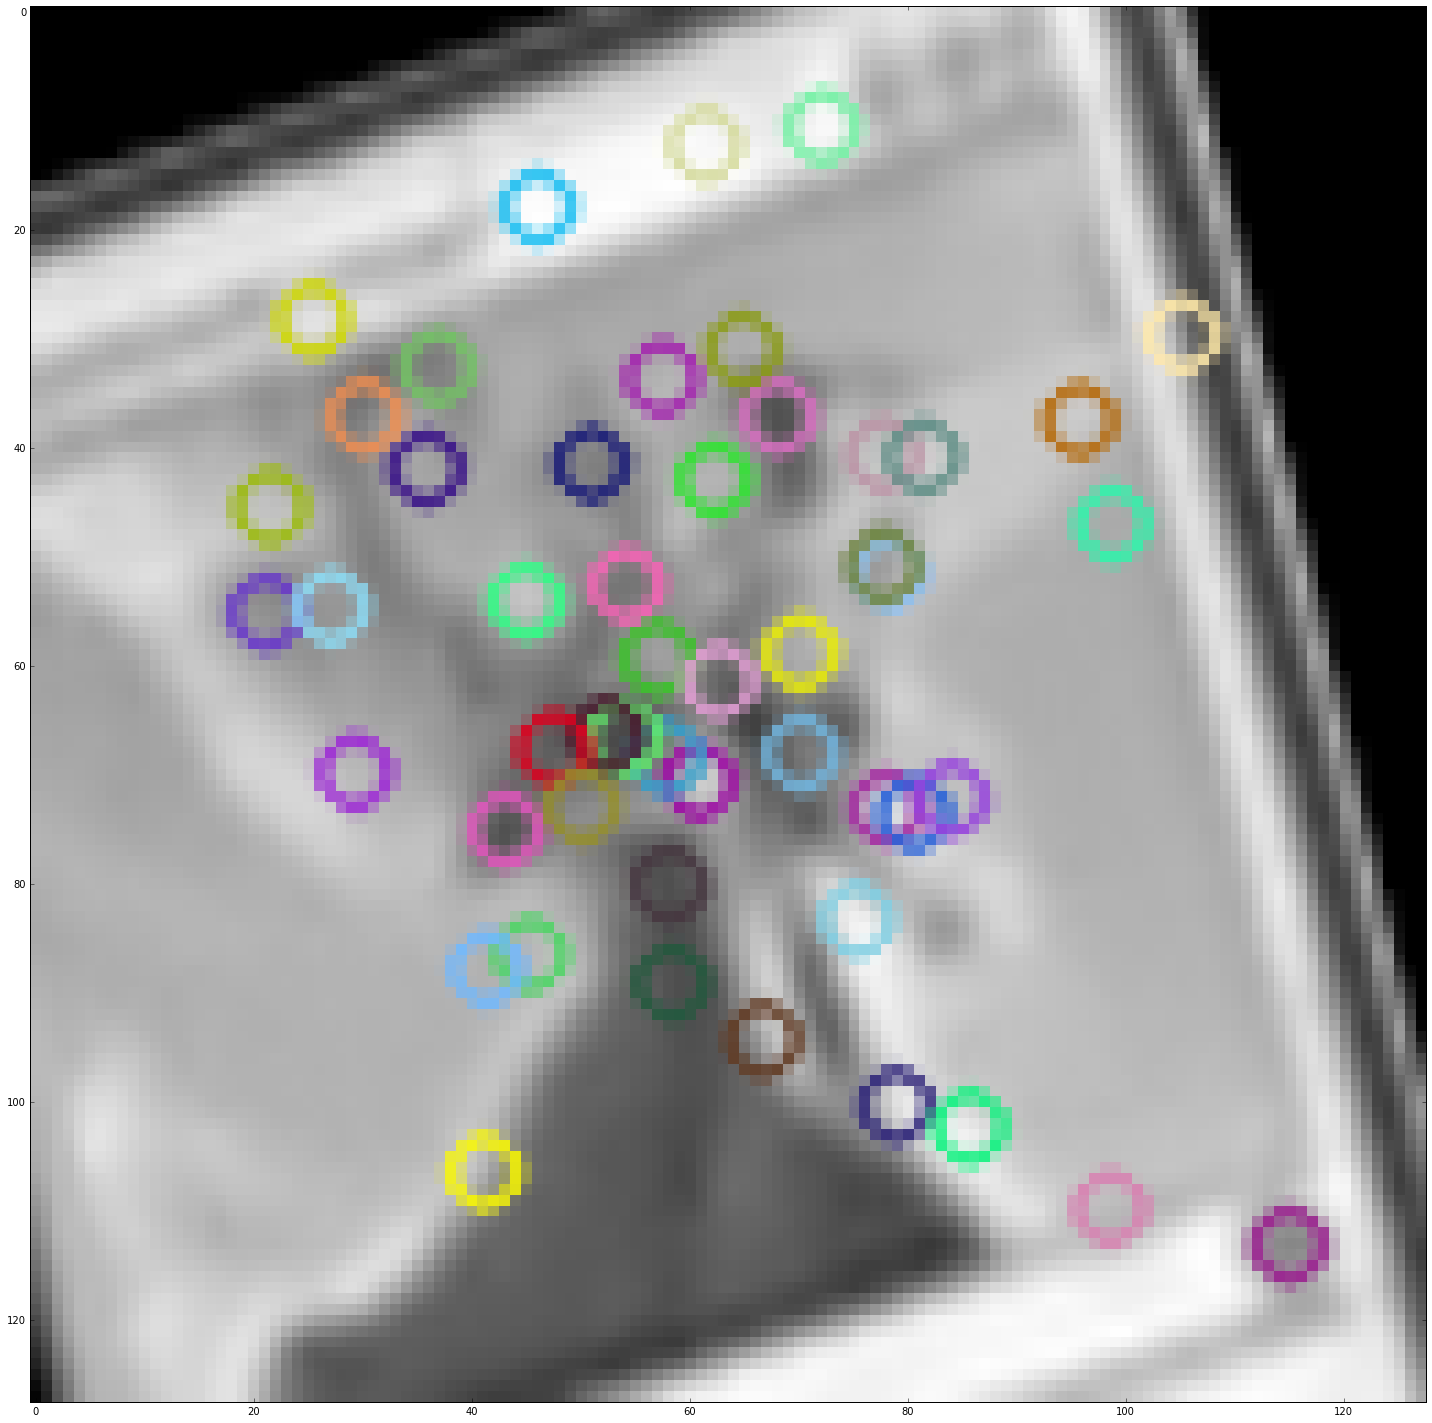

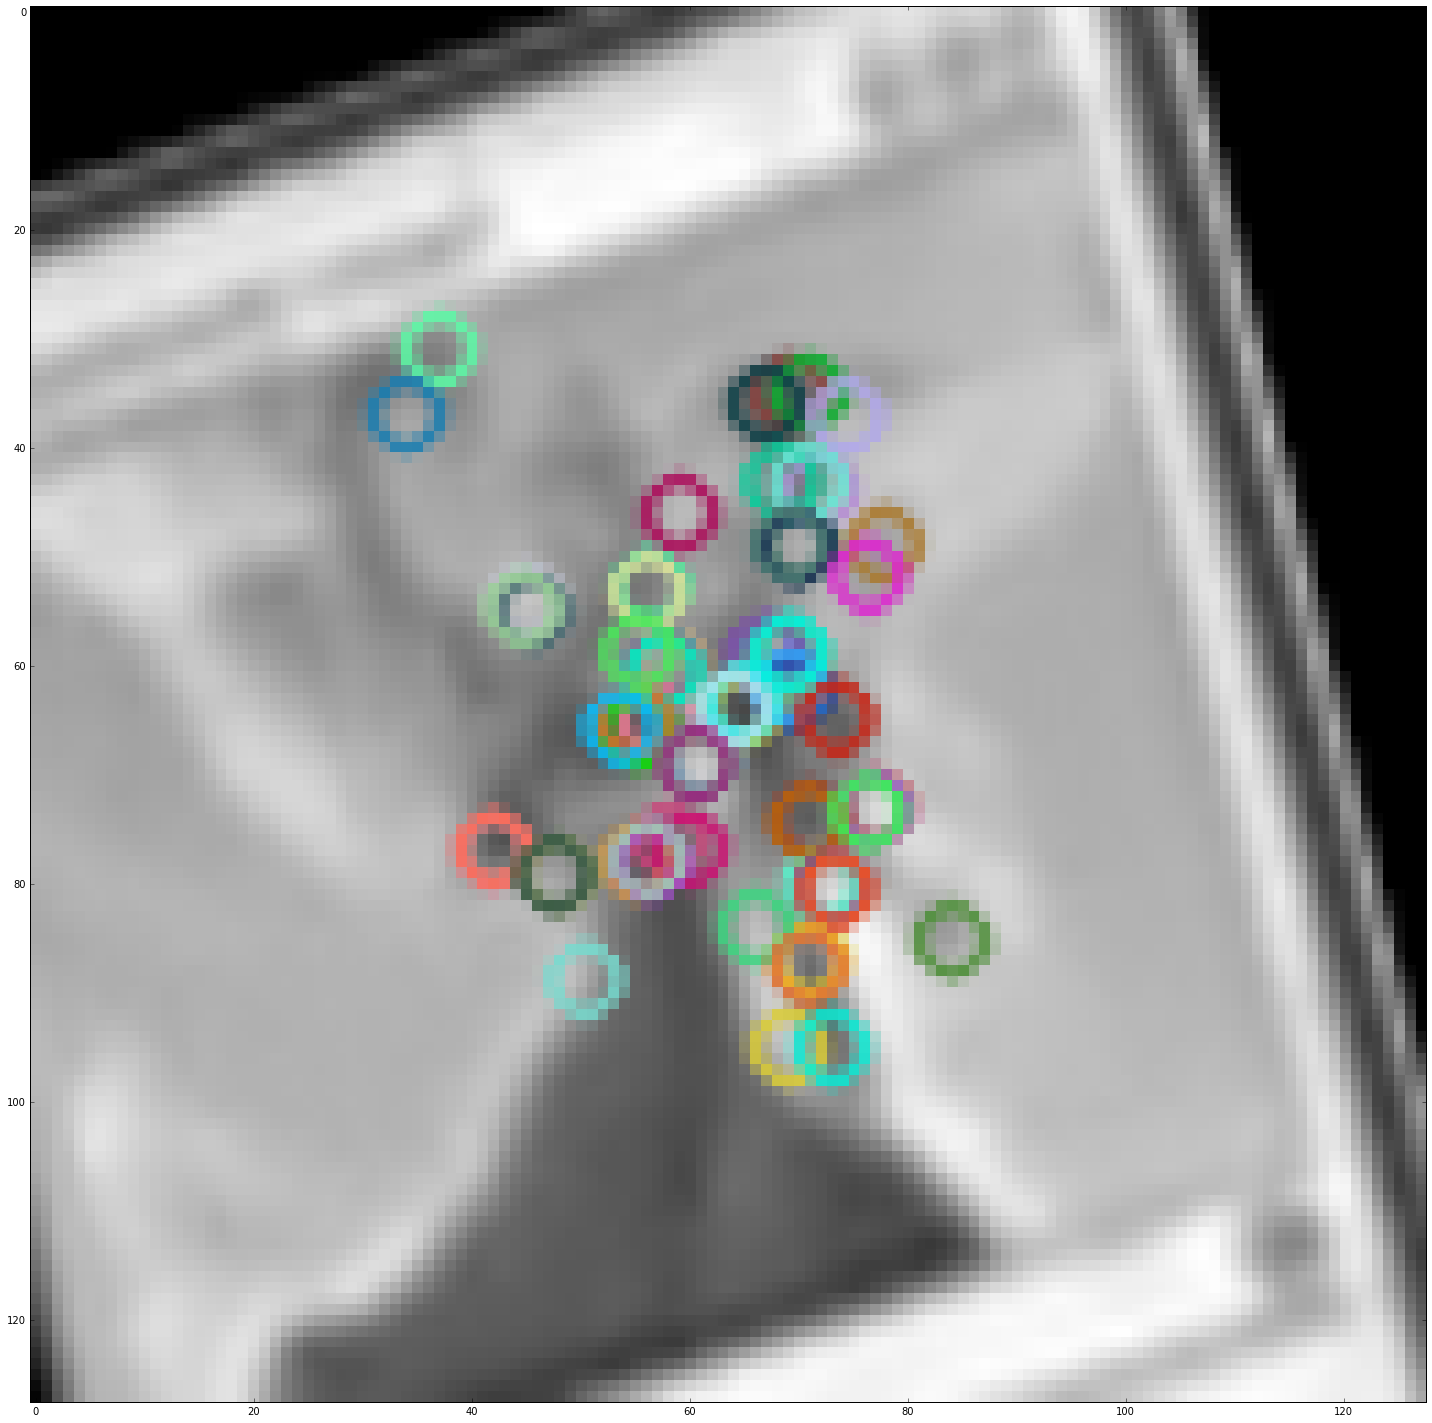

In [60]:
def showRotatedKeypoints(i, method):
    rows,cols, color = i.shape

    # Create a 2D rotationsmatrix
    M = cv2.getRotationMatrix2D((cols / 2,rows / 2), 15, 1)

    i = cv2.warpAffine(i, M, (cols, rows))
    i = i[0:70, 0:85]

    i =  cv2.resize(i, (128, 128), interpolation = cv2.INTER_CUBIC)
    return showKeypoints(i, method)

i = cv2.imread(os.getcwd() + '/data/testSet/Wispweaver Angel.png')

rotSift = showRotatedKeypoints(i, sift)
rotSurf = showRotatedKeypoints(i, surf)
rotOrb = showRotatedKeypoints(i, orb)

cv2.imwrite(os.getcwd() + '/data/keypoints/sift.png', rotSift)
cv2.imwrite(os.getcwd() + '/data/keypoints/surf.png', rotSurf)
cv2.imwrite(os.getcwd() + '/data/keypoints/orb.png', rotOrb)


TypeError: imsave() takes at least 2 arguments (1 given)

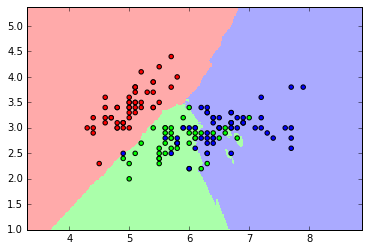

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


plt.show()
